In [1]:
import numpy as np
import math
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
from imageComponent import *
from remote_read_write import scp_read_wrapper, scp_write_wrapper
scp_Tload = scp_read_wrapper(T.load, 'ly_1112103017@172.16.35.121', 30907, '/public/ly/zyz/cluster_id_rsa', '/public/ly/zyz/imageCL/tmp')
scp_Tsave = scp_write_wrapper(T.save, 'ly_1112103017@172.16.35.121', 30907, '/public/ly/zyz/cluster_id_rsa', '/public/ly/zyz/imageCL/tmp')

device = 'cuda:3'

/public/ly/anaconda3/envs/zyz/lib/python3.10/site-packages/nvidia/dali/backend.py:46: Warning: DALI support for Python 3.10 is experimental and some functionalities may not work.
  deprecation_warning("DALI support for Python 3.10 is experimental and some functionalities "


In [3]:
def uniform(num):
    X = []
    y = []
    for i in range(5):
        tmp = T.rand(num, 2) * 2 - 1
        X.append(tmp)
        y += [i] * num
    X = T.cat(X, dim=0)
    y = T.tensor(y)
    return X, y
def circle(num):
    X = []
    y = []
    std = 0.01
    for i in range(5):
        theta = T.randn(num) * 2 * math.pi
        tmp = T.stack([T.sin(theta), T.cos(theta)], axis=1) * (T.randn(num) * std + i * 0.2 + 0.2)[:, None]
        X.append(tmp)
        y += [i] * num
    X = T.cat(X, dim=0)
    y = T.tensor(y)
    return X, y
def line(num):
    X = []
    y = []
    std = 0.05
    rad = T.tensor([math.pi * 0.4 * i for i in range(5)])
    for i in range(5):
        lenth = T.rand(num) * 2 - 1
        tmp = T.stack([T.sin(rad[i]), T.cos(rad[i])], axis=0)[None] * lenth[:, None] + T.randn(num, 2) * std
        X.append(tmp)
        y += [i] * num
    X = T.cat(X, dim=0)
    y = T.tensor(y)
    return X, y
def small(num):
    X = []
    y = []
    std = 0.01
    for i in range(5):
        center = T.rand(num // 15, 2) * 2 - 1
        center = T.cat([center] * 15, dim=0)
        tmp = center + T.randn(num, 2) * std
        X.append(tmp)
        y += [i] * num
    X = T.cat(X, dim=0)
    y = T.tensor(y)
    return X, y
def randomline(num):
    X = []
    y = []
    std = 0.01
    for i in range(5):
        end = T.rand(2, 2) * 2 -1 
        t = T.randn(num) * 0.1 + 0.5
        tmp = t[:, None] * end[0] + (1 - t)[:, None] * end[1] + + T.randn(num, 2) * std
        X.append(tmp)
        y += [i] * num
    X = T.cat(X, dim=0)
    y = T.tensor(y)
    return X, y
def mGauss(num):
    X = []
    y = []
    std = 0.1
    center = T.tensor([[-0.1089, -0.7626], [-0.7369,  0.8191], [0.7239, 0.6228], [-0.0020,  0.9966], [0.4988, 0.1974]])
    for i in range(5):
        tmp = T.randn(num, 2) * std + center[None, i]
        X.append(tmp)
        y += [i] * num
    X = T.cat(X, dim=0)
    y = T.tensor(y)
    return X, y

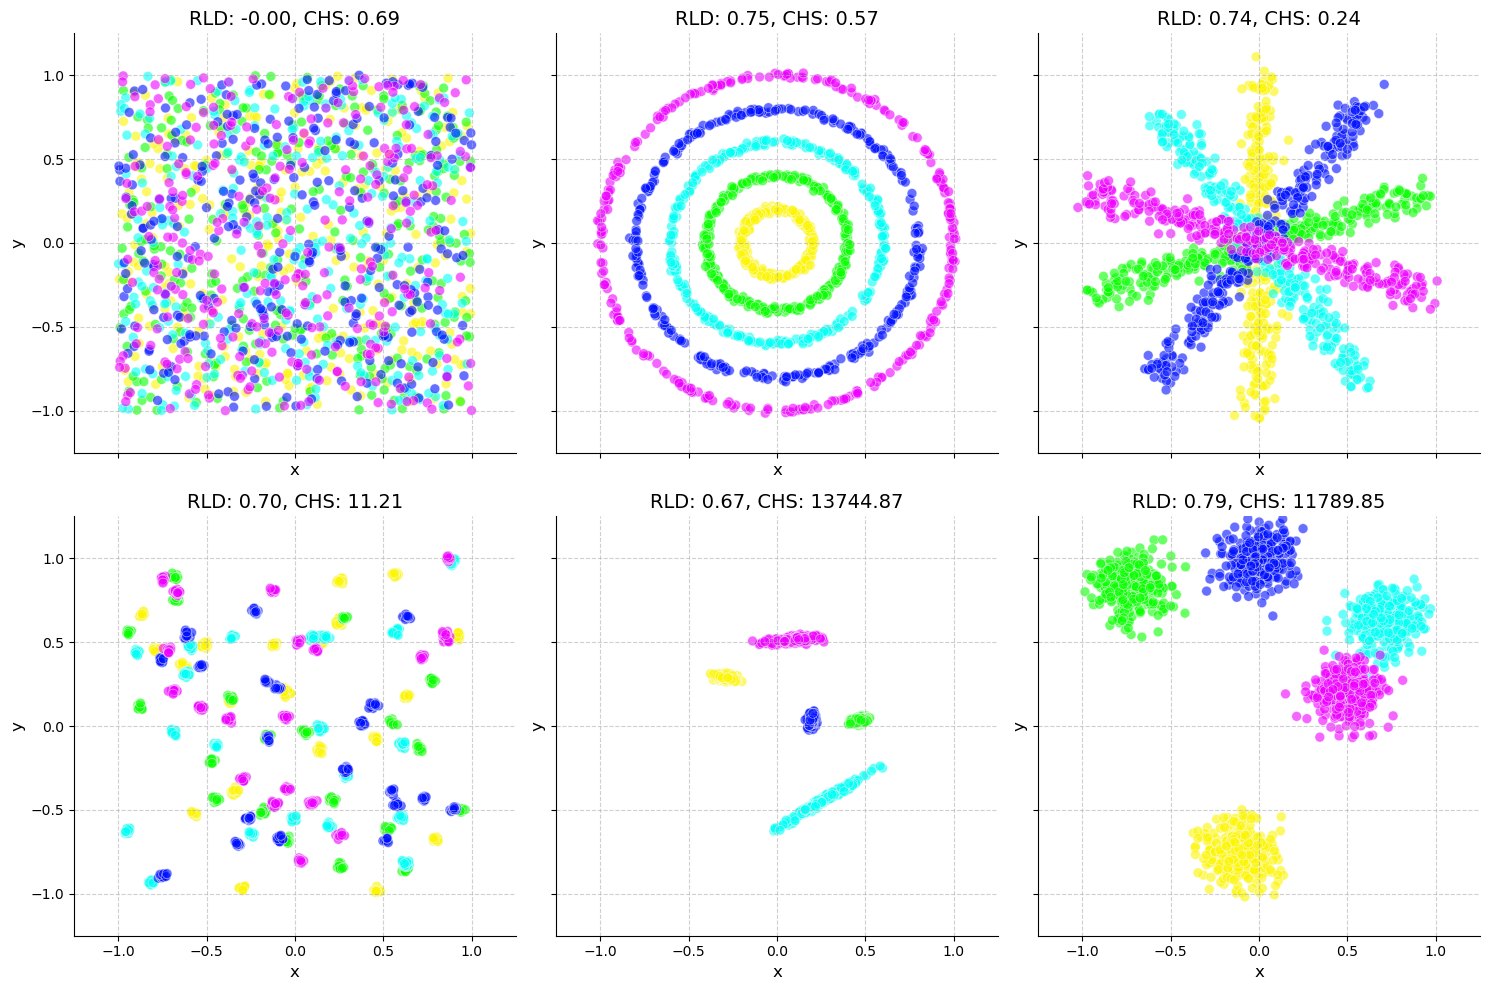

In [4]:
num = 300
# Create the data
data = [uniform(num), circle(num), line(num), small(num), randomline(num), mGauss(num)]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex='col', sharey='row')

# Choose a color palette with seaborn.
num_classes = 5
palette = np.array(sns.color_palette("hsv", num_classes))

# Create a title list for each subplot

for idx, (X, y) in enumerate(data):
    row = idx // 3
    col = idx % 3
    
    # Compute the RLD and CH scores
    RLD = relative_local_density_score(X, y, 0.05)
    CHS = calinski_harabasz_score(X, y)

    # Create an array of colors for each point.
    colors = palette[y]

    scatter = axes[row, col].scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='w', linewidth=0.5, s=50)
    axes[row, col].set_title(f'RLD: {RLD:.2f}, CHS: {CHS:.2f}', fontsize=14)
    axes[row, col].spines['top'].set_visible(False)
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].set_xlabel('x', fontsize=12)
    axes[row, col].set_ylabel('y', fontsize=12)
    axes[row, col].set_xlim([-1.25, 1.25])
    axes[row, col].set_ylim([-1.25, 1.25])
    axes[row, col].grid(True, linestyle='--', alpha=0.6)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

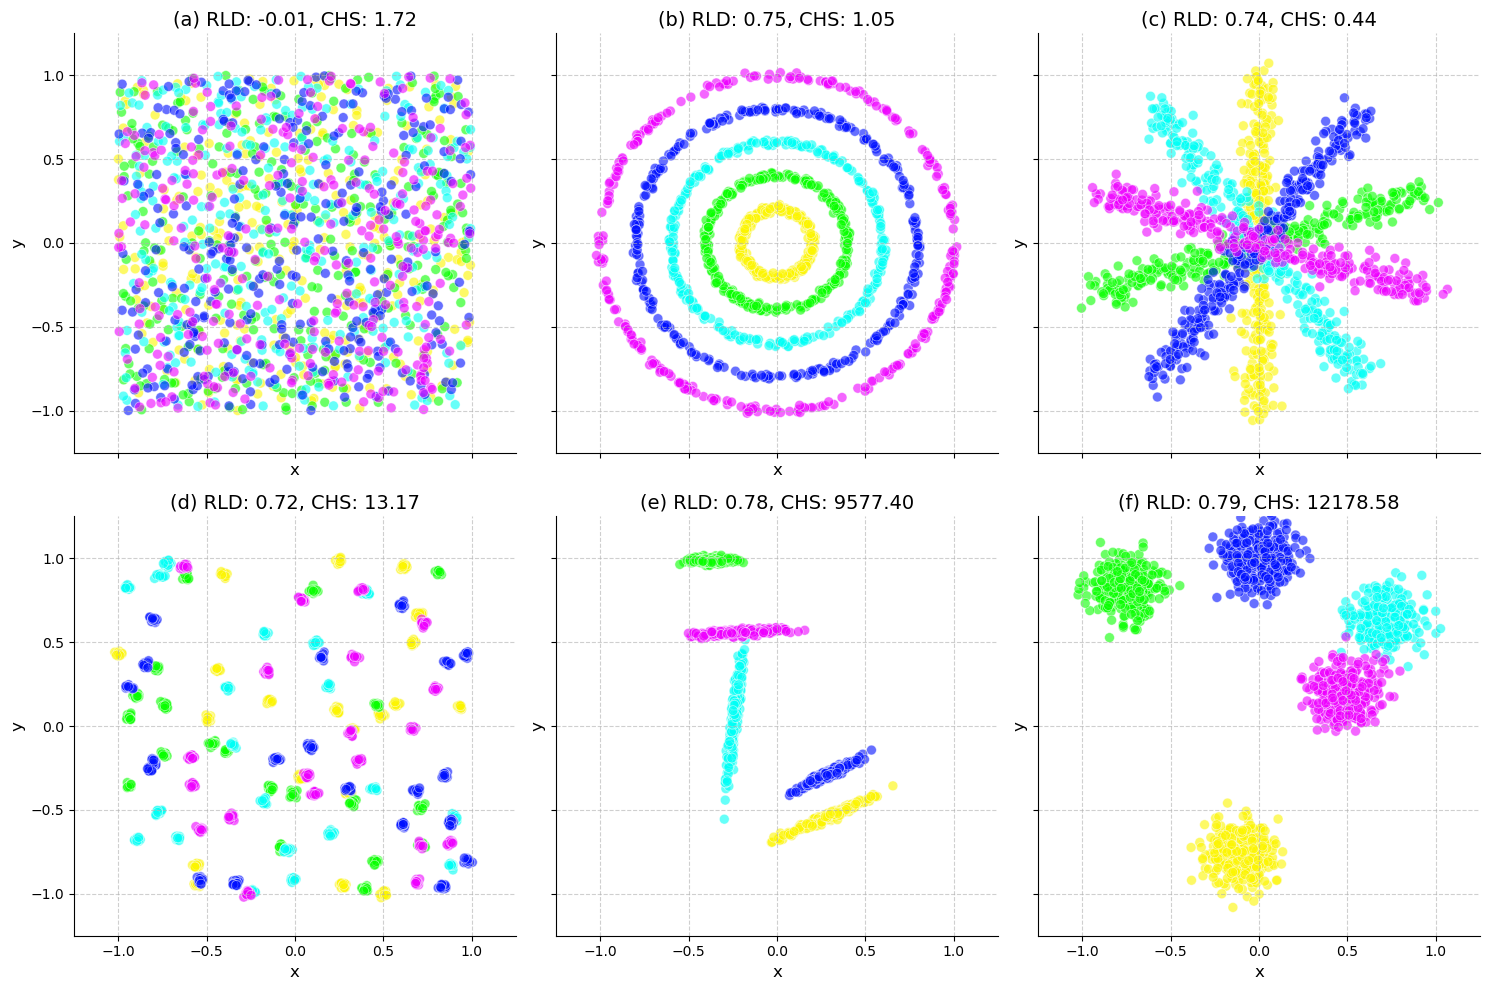

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you have functions uniform(), circle(), line(), small(), randomline(), mGauss() and relative_local_density_score()

num = 300
# Create the data
data = [uniform(num), circle(num), line(num), small(num), randomline(num), mGauss(num)]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10), sharex='col', sharey='row')

# Choose a color palette with seaborn.
num_classes = 5
palette = np.array(sns.color_palette("hsv", num_classes))

# Create a title list for each subplot

for idx, (X, y) in enumerate(data):
    row = idx // 3
    col = idx % 3
    
    # Compute the RLD and CH scores
    RLD = relative_local_density_score(X, y, 0.05)
    CHS = calinski_harabasz_score(X, y)

    # Create an array of colors for each point.
    colors = palette[y]

    scatter = axes[row, col].scatter(X[:, 0], X[:, 1], c=colors, alpha=0.6, edgecolors='w', linewidth=0.5, s=50)
    axes[row, col].set_title(f'({chr(ord("a") + idx)}) RLD: {RLD:.2f}, CHS: {CHS:.2f}', fontsize=14)
    axes[row, col].spines['top'].set_visible(False)
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].set_xlabel('x', fontsize=12)
    axes[row, col].set_ylabel('y', fontsize=12)
    axes[row, col].set_xlim([-1.25, 1.25])
    axes[row, col].set_ylim([-1.25, 1.25])
    axes[row, col].grid(True, linestyle='--', alpha=0.6)
    

# Adjust the layout and show the plot
plt.tight_layout()
plt.savefig("test.png", dpi=600,format="png")
plt.show()